In [6]:
### Simulate 
from floris import FlorisModel
from src.simulate_data import two_turbine_simulation
from src.simulate_data import two_turbine_simulation_data_generation


fmodel = FlorisModel("inputs/gch.yaml")
power = two_turbine_simulation(fmodel,x_turb2 = 0, y_turb2 = 600)

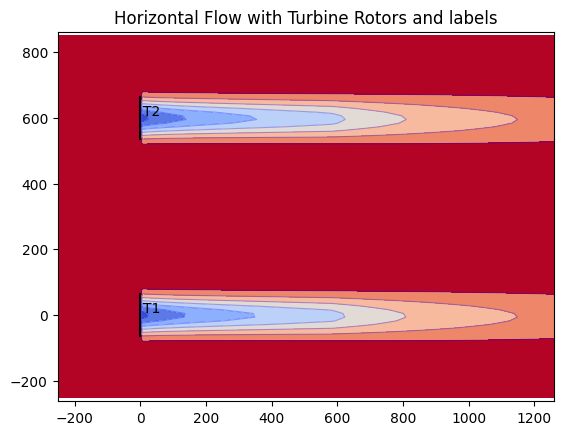

In [7]:
### Plot

import matplotlib.pyplot as plt
import floris.layout_visualization as layoutviz
from floris.flow_visualization import visualize_cut_plane

horizontal_plane = fmodel.calculate_horizontal_plane(
    x_resolution=200,
    y_resolution=100,
    height=90.0,
)

turbine_names = ["T1", "T2"]

fig, ax = plt.subplots()
visualize_cut_plane(
    horizontal_plane,
    ax=ax,
    label_contours=False,
    title="Horizontal Flow with Turbine Rotors and labels",
)

# Plot the turbine rotors
layoutviz.plot_turbine_rotors(fmodel, ax=ax)
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)

plt.show()

In [3]:
# Generate data using two_turbine_simulation_data_generation
data = two_turbine_simulation_data_generation(fmodel, 
                                              x_range=(800, 5000, 100), 
                                              y_range=(0, 600, 200),
                                              wind_speeds=[8.0],
                                              wind_directions=[270.0],
                                              turbulence_intensities=[0.06],
                                              dtype=float
                                              )

# Display the first few rows of the generated data
data.head()

# Save the generated data to a CSV file
#data.to_csv('data/two_turbine_simulation_data.csv', index=False)

KeyboardInterrupt: 